<a href="https://colab.research.google.com/github/FangNaut/FIFA2022/blob/main/FIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 Import neccesary libraries**

In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime 
import regex as re

In [ ]:
#Load data
from google.colab import files
uploaded = files.upload()

Saving international_matches.csv to international_matches.csv


# **2 EDA**

In [ ]:
#EDA
df = pd.read_csv('international_matches.csv')
df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [ ]:
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [ ]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [ ]:
#Convert 'date' column type from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
#Listing all columns contain 'NaN'
null_columns = [col for col in df.columns if df[col].isnull().any()]
null_columns

['home_team_goalkeeper_score',
 'away_team_goalkeeper_score',
 'home_team_mean_defense_score',
 'home_team_mean_offense_score',
 'home_team_mean_midfield_score',
 'away_team_mean_defense_score',
 'away_team_mean_offense_score',
 'away_team_mean_midfield_score',
 'home_total_score',
 'away_total_score',
 'diff_total_score']

In [ ]:
#Filter all teams qualified to World Cup 2022
wc2022_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                  'England', 'IR Iran', 'USA', 'Wales',
                  'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                  'France', 'Australia', 'Denmark', 'Tunisia',
                  'Spain', 'Costa Rica', 'Germany', 'Japan',
                  'Belgium', 'Canada', 'Morocco', 'Croatia',
                  'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                  'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

In [ ]:
# for x in wc2022_teams:
#   for y in null_columns:
#     df[y].fillna(df[df[y[0:9]] == x][y].mean(), inplace=True)

KeyError: ignored

In [ ]:
#World Cup 2022 team ranking
ranks = []
for x in wc2022_teams:
  rank_df = df[(df['home_team'] == x) | (df['away_team'] == x)].sort_values(['date', 'home_team_fifa_rank', 'away_team_fifa_rank'], ascending=[False, True, True]).iloc[0]
  if rank_df['home_team'] == x:
    rank = rank_df['home_team_fifa_rank']
  else: 
    rank = rank_df['away_team_fifa_rank']
  ranks.append(rank)

team_ranks = pd.DataFrame({'Team': wc2022_teams, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True)
team_ranks.index += 1
team_ranks

,Team,Rank
1,Brazil,1
2,Belgium,2
3,France,3
4,Argentina,4
5,England,5
6,Spain,7
7,Portugal,8
8,Mexico,9
9,Netherlands,10
10,Denmark,11


**2.1 Top 10 FIFA ranking**

In [ ]:
team_ranks.head(10)

,Team,Rank
1,Brazil,1
2,Belgium,2
3,France,3
4,Argentina,4
5,England,5
6,Spain,7
7,Portugal,8
8,Mexico,9
9,Netherlands,10
10,Denmark,11


**2.2 Which team has the strongest offense players?**

In [ ]:
#Top 10 Offensers
offense_score = []
for x in wc2022_teams:
  offense = np.round((df[df['home_team'] == x]['home_team_mean_offense_score'].mean() + df[df['away_team'] == x]['away_team_mean_offense_score'].mean())/2, 2)
  offense_score.append(offense)

off_rank = pd.DataFrame({'Team': wc2022_teams, 'OF Score': offense_score}).sort_values('OF Score', ascending=False).reset_index(drop=True)
off_rank.index += 1
off_rank

,Team,OF Score
1,Argentina,88.25
2,Brazil,86.55
3,Spain,85.87
4,France,85.70
5,Netherlands,85.47
6,England,85.09
7,Portugal,84.93
8,Uruguay,83.60
9,Germany,83.59
10,Belgium,81.71


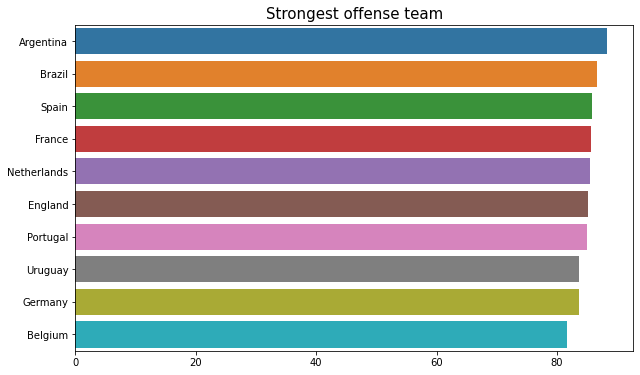

In [ ]:
#Plot the team w the strongest offensers
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.barplot(data = off_rank[:10], y = 'Team', x = 'OF Score', orientation = 'horizontal')
ax.set_title('Strongest offense team', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

The offense score is the average FIFA game score of players in offense position within a team. It is a close result between the top 3, Argentina is at the first place when they have lots of excellent offensers (L.Messi, Di María, Dybala, etc). Second place is Brazil with lots of excellent new generation players in the world (Vinícius Jr, Rodrygo, ...), followed by Spain and a bunch of countries.

**2.3 Which team has the strongest defenders?**

In [ ]:
#Top 10 Defenders
defense_score = []
for x in wc2022_teams:
  defense = np.round((df[df['home_team'] == x]['home_team_mean_defense_score'].mean() + df[df['away_team'] == x]['away_team_mean_defense_score'].mean())/2, 2)
  defense_score.append(defense)

def_rank = pd.DataFrame({'Team': wc2022_teams, 'DF Score': defense_score}).sort_values('DF Score', ascending=False).reset_index(drop=True)
def_rank.index += 1
def_rank

,Team,DF Score
1,Brazil,85.94
2,Spain,85.51
3,Germany,84.69
4,England,84.69
5,France,84.09
6,Argentina,83.00
7,Portugal,82.89
8,Belgium,81.23
9,Netherlands,80.73
10,Serbia,80.23


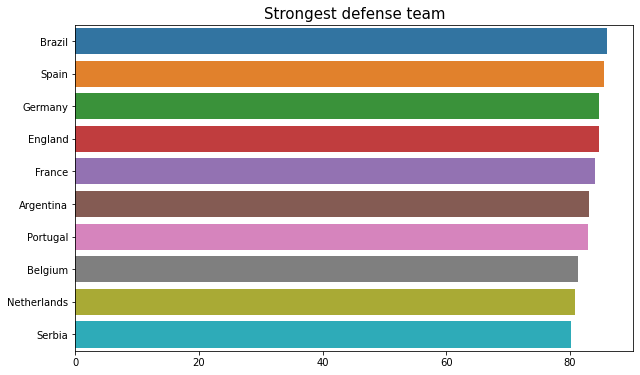

In [ ]:
#Plot the team w strongest defenders
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.barplot(data = def_rank[:10], y = 'Team', x = 'DF Score', orientation = 'horizontal')
ax.set_title('Strongest defense team', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

It is not a surpise when Brazil is the strongest defense team with all excellent defenders who play for top football club in the world (Real Madrid, PSG, Chelsea, etc). Spain and Germany is top 2 and 3 strongest defense team, respectively.

**2.4 Which team has the strongest midfielders?**

In [ ]:
#Top 10 Midfield
mf_score = []
for x in wc2022_teams:
  mf = np.round((df[df['home_team'] == x]['home_team_mean_midfield_score'].mean() + df[df['away_team'] == x]['away_team_mean_midfield_score'].mean())/2, 2)
  mf_score.append(mf)

mid_rank = pd.DataFrame({'Team': wc2022_teams, 'MF Score': mf_score}).sort_values('MF Score', ascending=False).reset_index(drop=True)
mid_rank.index += 1
mid_rank

,Team,MF Score
1,Spain,87.12
2,France,86.16
3,Germany,85.80
4,Brazil,85.35
5,England,84.52
6,Argentina,84.44
7,Netherlands,83.70
8,Portugal,83.59
9,Belgium,81.52
10,Croatia,81.21


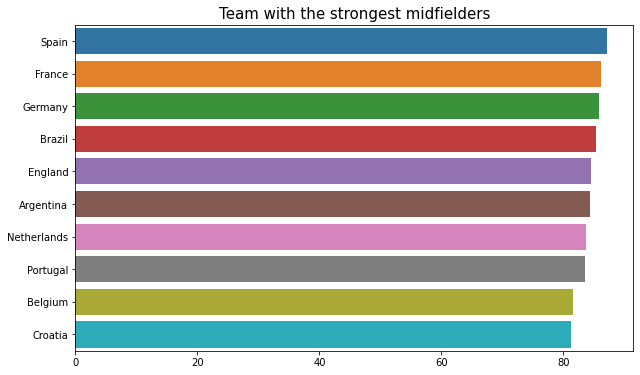

In [ ]:
#Plot the team w strongest midfielders
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.barplot(data = mid_rank[:10], y = 'Team', x = 'MF Score', orientation = 'horizontal')
ax.set_title('Team with the strongest midfielders', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

As expected, Spain is in first place, with controlling possession tactic built based quality midfielders. In second place is France's midfielders, the important factor that helped France achieves the World Cup championship in 2018.

**2.5 Which team has the strongest goalkeepers?**

In [ ]:
#Top 10 GK scores
goalkeeper_score = []
for x in wc2022_teams:
    gk_score = np.round((df[df["home_team"]==x]['home_team_goalkeeper_score'].mean() + df[df["away_team"]==x]['away_team_goalkeeper_score'].mean())/2, 2)
    goalkeeper_score.append(gk_score)

gk_rank = pd.DataFrame({'Team':wc2022_teams, 'GK Score': goalkeeper_score}).sort_values('GK Score', ascending=False).reset_index(drop=True)
gk_rank.index += 1
gk_rank

,Team,GK Score
1,Germany,89.02
2,Spain,88.78
3,France,86.86
4,Brazil,86.28
5,England,83.25
6,Netherlands,83.23
7,Belgium,82.41
8,Poland,82.10
9,Portugal,81.81
10,USA,81.12


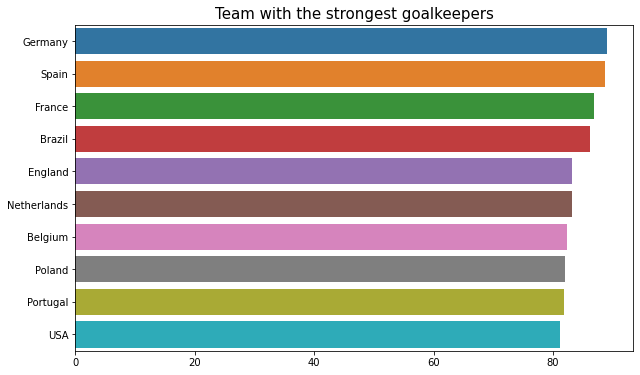

In [ ]:
#Plot the team w strongest gk
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.barplot(data = gk_rank[:10], y = 'Team', x = 'GK Score', orientation = 'horizontal')
ax.set_title('Team with the strongest goalkeepers', fontsize = 15)
ax.set(xlabel = '', ylabel = '')

plt.show()

**2.6 Which team has the highest total score ?**

In [ ]:
#Top 10 Total Scores
df['home_total_score'] = (df['home_team_mean_offense_score'] + df['home_team_mean_defense_score'] + df['home_team_mean_midfield_score']) / 3
df['away_total_score'] = (df['away_team_mean_offense_score'] + df['away_team_mean_defense_score'] + df['away_team_mean_midfield_score']) / 3
df['diff_total_score'] = df['home_total_score'] - df['away_team_score']

score = df[['date', 'home_team', 'away_team', 'home_total_score', 'away_total_score']]
home = score[['date', 'home_team', 'home_total_score']].rename(columns = {'home_team' : 'team', 'home_total_score' : 'total_score'})
away = score[['date', 'away_team', 'away_total_score']].rename(columns = {'away_team' : 'team', 'away_total_score' : 'total_score'})
score = home.append(away)

score = score.sort_values(['team', 'date'], ascending = [True, False])
score['row_number'] = defense.groupby('team').cumcount()+1
score_rank = score[offense['row_number'] == 1].drop('row_number', axis = 1).nlargest(10, 'total_score')
score_rank

,date,team,total_score
23885,2022-06-13,France,86.433333
23866,2022-06-12,Spain,85.833333
23906,2022-06-14,England,85.666667
23760,2022-06-06,Brazil,85.533333
23867,2022-06-12,Portugal,85.233333
23741,2022-06-05,Argentina,85.066667
23907,2022-06-14,Germany,84.833333
23907,2022-06-14,Italy,84.666667
23909,2022-06-14,Belgium,84.000000
23908,2022-06-14,Netherlands,83.900000


**2.7 Which team won the World Cup tournament the most time ?**

In [ ]:
#All final result of every WC
wc = df.loc[df['tournament'].str.match('FIFA World Cup$', case = True)]
#Format date 
wc['date'] = pd.to_datetime(wc['date'], format='%Y-%m-%d')
wc['year'] = wc['date'].dt.strftime('%Y')
#Select all final of all WC
wc = wc.sort_values(['date'], ascending = False)
wc['row_number'] = wc.groupby('year').cumcount()+1
wc_final = wc[wc['row_number'] == 1].drop(['row_number', 'year'], axis = 1)
wc_final

<ipython-input-18-bc95557cfd6d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc['date'] = pd.to_datetime(wc['date'], format='%Y-%m-%d')
<ipython-input-18-bc95557cfd6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc['year'] = wc['date'].dt.strftime('%Y')


,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_total_score,away_total_score,diff_total_score
20449,2018-07-15,France,Croatia,Europe,Europe,2,12,2164,2036,4,...,85.0,84.0,86.3,86.2,80.8,79.3,85.8,85.500000,81.966667,83.500000
16936,2014-07-13,Germany,Argentina,Europe,South America,2,5,1299,1174,1,...,79.0,84.5,84.7,86.0,81.2,89.3,83.2,85.066667,84.566667,85.066667
13238,2010-07-11,Netherlands,Spain,Europe,Europe,4,2,0,0,0,...,90.0,77.8,83.7,83.8,85.0,85.3,87.0,81.766667,85.766667,80.766667
9727,2006-07-09,Italy,France,Europe,Europe,13,8,0,0,1,...,90.0,90.2,89.3,86.5,87.5,91.0,89.0,88.666667,89.166667,87.666667
6410,2002-06-30,Germany,Brazil,Europe,South America,11,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3153,1998-07-12,France,Brazil,Europe,South America,18,1,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,1994-07-17,Brazil,Italy,South America,Europe,3,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Count the total number of each team play WC final. How many win/lose. Draw chart
home = wc_final[['home_team']].rename(columns = {'home_team' : 'team'})
away = wc_final[['away_team']].rename(columns = {'away_team' : 'team'})
team_final = home.append(away)
team_count = team_final[['team']].groupby(['team']).size()
team_count.to_frame

<bound method Series.to_frame of team
Argentina      1
Brazil         3
Croatia        1
France         3
Germany        2
Italy          2
Netherlands    1
Spain          1
dtype: int64>

In [ ]:
#WC Champion
champ = wc_final[['date', 'city', 'country']]
champ['champion'] = wc_final.apply(lambda col: col['home_team'] if col['home_team_result'] == 'Win' else col['away_team'], axis = 1)
champ_count = champ.groupby(['champion']).size()
champ_count.to_frame

<ipython-input-20-96c3a2075718>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champ['champion'] = wc_final.apply(lambda col: col['home_team'] if col['home_team_result'] == 'Win' else col['away_team'], axis = 1)


<bound method Series.to_frame of champion
Brazil     2
France     2
Germany    1
Italy      1
Spain      1
dtype: int64>

In [ ]:
attend_win = pd.concat([team_count, champ_count], axis = 1).reset_index()
attend_win.columns = ['team', 'attended', 'won']
attend_win['won'] = attend_win['won'].astype('Int32')
attend_win.sort_values(by = 'won', ascending = False).fillna(0)

,team,attended,won
1,Brazil,3,2
3,France,3,2
4,Germany,2,1
5,Italy,2,1
7,Spain,1,1
0,Argentina,1,0
2,Croatia,1,0
6,Netherlands,1,0


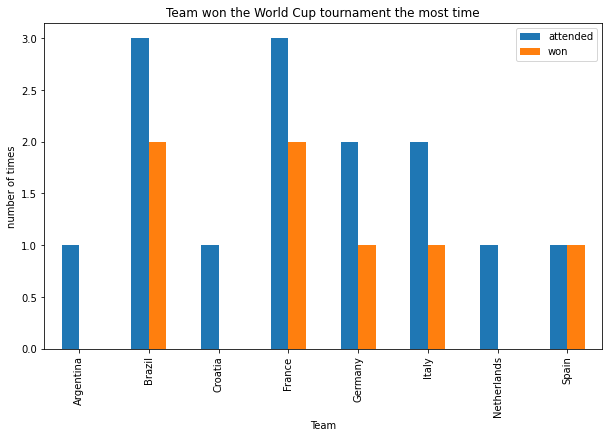

In [ ]:
#Visualize attend_win
attend_win.reset_index().plot(figsize=(10, 6), x="team", y=["attended", "won"], kind="bar")
plt.title("Team won the World Cup tournament the most time")
plt.xlabel("Team")
plt.ylabel("number of times")

plt.show()

Brazil and France are two countries that both won the tournament 2 times. Followed by Germany, Italy, and Spain won once. Argentina, Croatia, and the Netherlands all attended the World Cup final once but still did not touch the championship trophy.

**2.8 Is there really such a thing as a home team advantage ?**

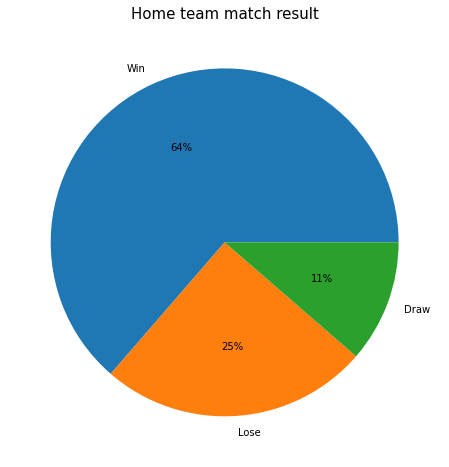

In [ ]:
#Home team advantage
#Select all matches played at non-neutral locations
home_team_adv = wc[wc['neutral_location'] == False]['home_team_result'].value_counts(normalize=True)
#plot
fig, axes = plt.subplots(1, 1, figsize = (8, 8))
ax = plt.pie(home_team_adv, labels = ['Win', 'Lose', 'Draw'], autopct='%.0f%%')
plt.title('Home team match result', fontsize = 15)
plt.show()

It is a huge advantage for the host team when they can play in their home country with a much larger chance of winning the game. However, sometimes there is a draw or lose result for home team because the enormous gap between the ranking and the quality of players of home team and away team

In [ ]:
#Find team have longest win streak
streakdf = {}
for team in 

,date,team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score,home_total_score,away_total_score,diff_total_score,home_team
15,1993-08-22,Argentina,Peru,South America,South America,5,70,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,1993-08-29,Argentina,Paraguay,South America,South America,5,67,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,1993-09-05,Argentina,Colombia,South America,South America,5,19,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,1993-11-17,Argentina,Australia,South America,Oceania,9,61,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,1993-12-15,Argentina,Germany,South America,Europe,9,3,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,1994-04-20,Argentina,Morocco,South America,Africa,10,26,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,1994-06-21,Argentina,Greece,South America,Europe,8,31,0,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,1994-06-25,Argentina,Nigeria,South America,Africa,8,11,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,1994-06-30,Argentina,Bulgaria,South America,Europe,8,29,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,1995-02-14,Argentina,Bulgaria,South America,Europe,10,16,0,0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Numerical column for match result
wc['match_result'] = np.where(wc['home_team_result']=='Win', 2, np.where(wc['home_team_result']=='Draw', 1, 0))

#Rank diff between home and away team
wc['rank_diff'] = wc['away_team_fifa_rank'] - wc['home_team_fifa_rank']

#Offense home team vs defense away team
wc['offense/defense_ratio'] = wc['home_team_mean_offense_score'] / wc['away_team_mean_defense_score']

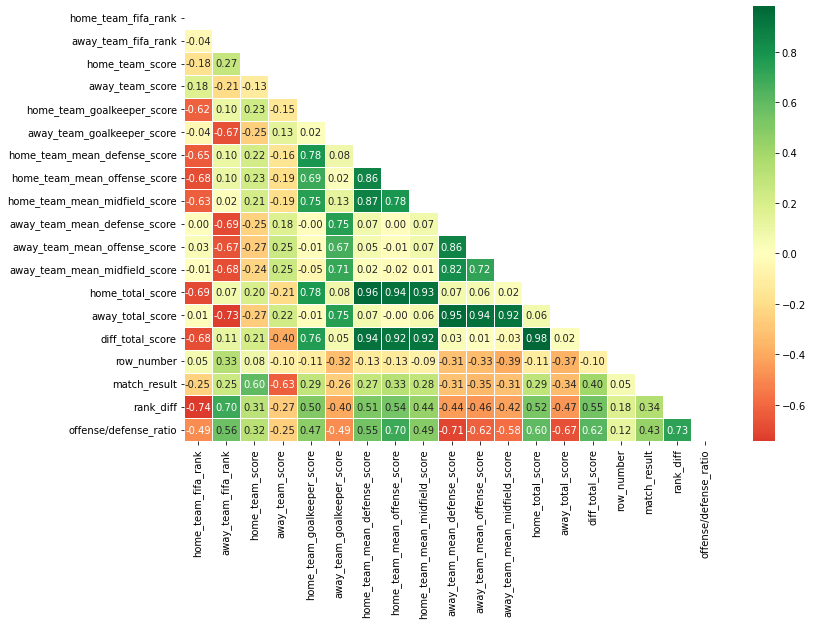

In [ ]:
#Create the correlation matrix
corr_mean = wc.drop(['home_team_total_fifa_points', 'away_team_total_fifa_points', 'neutral_location'], axis=1).corr(method = 'pearson')

#Create the mask for the upper triangle
mask = np.triu(np.ones_like(corr_mean, dtype=bool))

#Add the mask to the heatmap
fig, axes = plt.subplots(figsize=(12,8))
axes = sns.heatmap(corr_mean, mask=mask, cmap = 'RdYlGn', center=0, linewidths=1, annot=True, fmt='.2f')
plt.show()

In [ ]:
# <!-- Edit and understand this -->
# We can clearly find some nice correlations here. Of course, the more the home team score and the less the away team scores, the better the chances are for the home team to win the match.

# The FIFA rank is also of great importance in determining the match result. The stronger team tends to win the game, but this clearly doesn't happen all the time. Why do you think this is???